# Assignment 3: Reinforcement Learning

**Goal**: Get familiar with a reinforcement learning approach to solve multi-armed bandit problem.

We will implement a value-based reinforcement learning approach with two
algorithm variations: epsilon-greedy (e-greedy) and upper confidence bound
(UCB) algorithms and perform an analysis on their behavior.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

* Plagiarism is automatically checked and set to **0 points**

* It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

* Use of generative AI to answer **ANY** part of the assignment is
**strictly prohibited**, if any part of the assignment is found to be
answered using generative AI, the question will be awarded **0 points**.

## 1. Introduction: Multi-Armed Bandit Problem

Imagine you are in a casino facing a row of slot machines, say there are 20 of them. Each slot machine is providing reward based on a certain probability distribution that is unknown to you.

This is your first time in this casino, thus you have no idea what to do next. You have just enough money to play for 100 times and each of these times, you can pick any machine you want and after "pulling"

What would you do?

The overall goal would of course be to find out the one that is providing the most reward, right? What should your algorithm be to get the most reward at the end?

## 2. Implementation

In [1]:
%pip install 'matplotlib>=3.7' 'numpy>=1.25' 'tqdm>=4.65' ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install 'matplotlib>=3.7' 'numpy>=1.25' 'tqdm>=4.65' --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

In [4]:
# First import the dependencies
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange

**Question 1 (0-0.25-0.5pt):** Please write down mathematical expressions arm selection for the e-greedy and UCB algorithms and discuss their parameters.

**Answer:** 
e-greedy:
A (t+1) = argmax[Q(a)] if random < 1-epsilon
                       else

---

**Task 1 (3 pt):** Please implement the e-greedy and UCB algorithms in the code given below.

In [5]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.75 pts if the code works but some functions are incorrect and it is badly explained
# 1.5 pts if the code works but some functions are incorrect but it is explained well
# 2.25 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 3 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


# ============ PLEASE DO NOT CHANGE ============ #


def initialize(n_arms):
    rng = np.random.default_rng()
    R = rng.uniform(low=0.45, high=0.55, size=n_arms)
    R[rng.integers(n_arms)] = 0.9
    # return actual mean of the reward probabilities
    return R


# ================================================ #


# the epsilon-greedy algorithm (ignore kwargs)
def e_greedy(Q, epsilon, **kwargs):
    ########### PLEASE FILL IN ##############
    random = np.random.random()
    if random < 1-epsilon:
        selection = np.argmax(Q)
    else:
        selection = np.random.randint(low=0,high=len(Q))
    #########################################
    return selection


# The upper confidence bound algorithm (ignore kwargs)
def UCB(Q, selection_counter, t, **kwargs):
    C = 0.5  # Parameter (keep it constant)
    ########### PLEASE FILL IN ##############
    selection = np.argmax(Q + C*np.sqrt((np.log(t)/selection_counter)))
    #########################################
    return selection


def MAB(
    trials,  # total number of arm pulls
    n_arms,  # number of arms to pull
    epsilon,  # exploration parameter for the epsilon-greedy algorithm
    alpha,  # learning rate for updating Q-values
    init,  # initial starting value of the Q-values
    algorithm,  # the type of update: e_greedy or UCB
):
    # ============ PLEASE DO NOT CHANGE ============ #
    # initialization of the reward distributions unknown to the player
    R = initialize(n_arms)
    cumulative_reward_trend = np.zeros(trials)
    selection_trend = np.zeros(trials)
    reward_trend = np.zeros(trials)
    cumulative_reward = 0

    # initialize counter of selection for each arms
    selection_counter = np.zeros(n_arms)
    # initialize initial estimates of rewards
    Q = np.ones(n_arms) * init
    # ================================================ #

    for i in trange(trials, leave=False):
        # ============ PLEASE DO NOT CHANGE ============ #
        # select an arm to pull based on reward estimates and other
        kwargs = {
            "Q": Q,
            "epsilon": epsilon,
            "selection_counter": selection_counter,
            "t": i,
        }
        selection = algorithm(**kwargs)
                
        reward = np.random.normal(R[selection], 0.01)
        # ================================================ #

        ########### PLEASE FILL IN ##############
        # Update Q values
        Q[selection] = reward
        ########################################

        # ============ PLEASE DO NOT CHANGE ============ #
        reward_trend[i] = reward
        selection_trend[i] = selection
        selection_counter[selection] += 1
        cumulative_reward += reward
        cumulative_reward_trend[i] = cumulative_reward
        # ================================================ #

    return reward_trend

**Question 2 (0-0.25-0.5pt):** Please explain the concept of exploration and exploitation in the context epsilon-greedy and UCB algorithm contexts.
How does the epsilon-greedy algorithm balance exploration and exploitation?


**Answer:** 
    Exploration and exploitation are both characteristics which should be balanced out in order to find more optimal results. Exploitation means the algorithm has a belief of what the best option is, and keeps exploiting it, while exploration means the algorithm is going to choose actions which are not previously known to give optimal results, but by knowing them, it can compare them to previous results and see if its better or not. In the context of epsilon-greedy and UCB algorithms, they both introduce parameters and conditions in order to improve exploration.
    Epsilon-greedy balances exploration and exploitation by changing the epsilon value. To select an action, it will firstly pick a random number between 0 and 1. If this number is lower than 1-epsilon, then the action with the best average reward will be chosen. Else, it will pick a random action. In this way, it will mostly exploit the best rewarding actions, but also has a small chance of finding new actions which could bring more optimal results. The higher the epsilon, the higher the exploration. That is why it can also be called "exploration rate".

---

## 3. Algorithm Analysis

In [6]:
# ============ PLEASE DO NOT REMOVE ============ #
def plot_experiments(experiment1, experiment2, labels):
    experiment1 = np.array(experiment1)
    experiment1_std = np.std(experiment1, axis=0)
    experiment1_mean = np.mean(experiment1, axis=0)

    experiment2 = np.array(experiment2)
    experiment2_std = np.std(experiment2, axis=0)
    experiment2_mean = np.mean(experiment2, axis=0)

    mean = [experiment1_mean, experiment2_mean]
    std = [experiment1_std, experiment2_std]

    plt.figure(figsize=(12, 6))
    y_values = np.arange(0, len(mean[0]))
    for i in range(len(mean)):
        plt.plot(y_values, mean[i], label=labels[i])
        plt.fill_between(y_values, mean[i] + std[i], mean[i] - std[i], alpha=0.2)

    plt.xlabel("Arm pulls (trials)")
    plt.ylabel("Average reward of 20 runs")

    plt.legend()


# ================================================ #

## 2. Comparison of e-greedy and UCB algorithms

Running the code below will launch all the experiments that we would like to plot and perform analysis on.

In [7]:
experiment1 = []  # epsilon greedy epsilon: 0.1 initial Q: 0
experiment2 = []  # epsilon greedy epsilon: 0.1 initial Q: 1
experiment3 = []  # epsilon greedy epsilon: 0.2 initial Q: 0

experiment4 = []  # UCB initial Q: 0
experiment5 = []  # UCB initial Q: 1

for _ in trange(20):
    # MAB(trials, n_arms, epsilon, alpha, init, algorithm)
    experiment1.append(MAB(5_000, 20, 0.1, 0.1, 0, e_greedy))
    experiment2.append(MAB(5_000, 20, 0.1, 0.1, 1, e_greedy))
    experiment3.append(MAB(5_000, 20, 0.2, 0.1, 0, e_greedy))

    experiment4.append(MAB(5_000, 20, 0.1, 0.1, 0, UCB))
    experiment5.append(MAB(5_000, 20, 0.1, 0.1, 1, UCB))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

/var/folders/n9/gzn6dl6d3vn0nd1y6zryfp9c0000gn/T/ipykernel_1279/1695984490.py:41: RuntimeWarning: divide by zero encountered in log
  selection = np.argmax(Q + C*np.sqrt((np.log(t)/selection_counter)))
/var/folders/n9/gzn6dl6d3vn0nd1y6zryfp9c0000gn/T/ipykernel_1279/1695984490.py:41: RuntimeWarning: invalid value encountered in sqrt
  selection = np.argmax(Q + C*np.sqrt((np.log(t)/selection_counter)))
/var/folders/n9/gzn6dl6d3vn0nd1y6zryfp9c0000gn/T/ipykernel_1279/1695984490.py:41: RuntimeWarning: invalid value encountered in divide
  selection = np.argmax(Q + C*np.sqrt((np.log(t)/selection_counter)))
/var/folders/n9/gzn6dl6d3vn0nd1y6zryfp9c0000gn/T/ipykernel_1279/1695984490.py:41: RuntimeWarning: divide by zero encountered in divide
  selection = np.argmax(Q + C*np.sqrt((np.log(t)/selection_counter)))


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

---
**Question 3 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 0 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** The UCB Algorithm worked better, as can bee seen on the plot. The line for UCB. That is because the UCB exploration is more targeted, prioritizing actions with more uncertainty of reward, and these uncertainties are constantly updated in each iteration, while epsilon-greedy has a constant random-selection algorithm, thus the selection of new actions is completely random, therefore less effective.

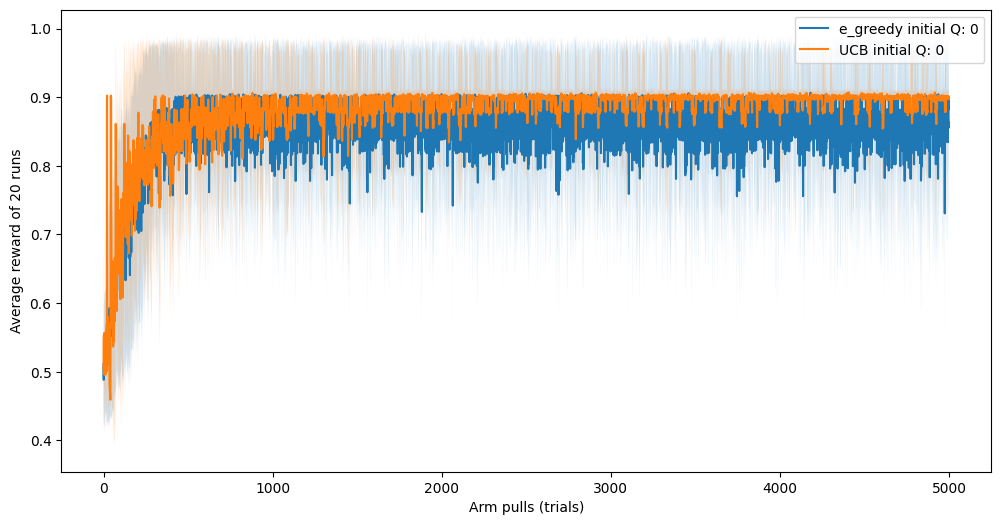

In [15]:
label = ["e_greedy initial Q: 0", "UCB initial Q: 0"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment4,
    ########################################
    label,
)

---
**Question 4 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy and UCB algorithms for initial Q: 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** The UCB algorithm worked better because of the same reason as before. It can be seen in the plot that the constancy of high rewards is much larger for the UCB algorithm than the Epsilon-Greedy one. That is because, as uncertainty of reward values are constantly updated for each action in the UCB algorithm, it is better at decision making when choosing new actions, instead of just choosing them randomly, like Epsilon-Greedy.

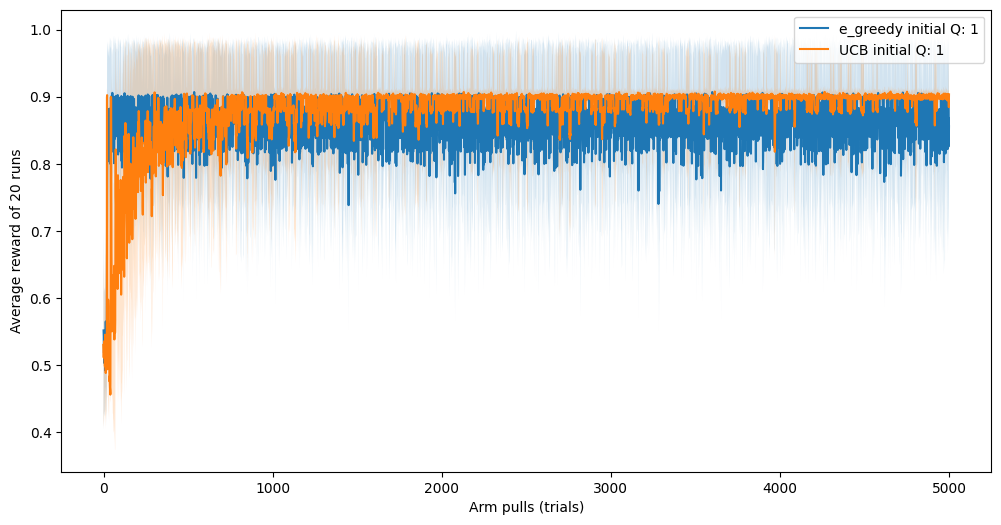

In [16]:
label = ["e_greedy initial Q: 1", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment2,
    experiment5,
    ########################################
    label,
)

---
**Question 5 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for initial Q: 0 for epsilon values 0.1 and 0.2 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** The algorithm which worked better was the Epsilon-Greedy with epsilon value 0.1. That is because, when increasing epsilon value, the exploration also increases, and the more exploration, the less exploitation. We can see that e-greedy for epsilon 0.1 was more consntant on selecting the best rewarding actions, and the variance of the rewards was much less than e-greedy with epsilon 0.2, because the latter has a higher chance of selecting actions at random instead of the ones with reward value.

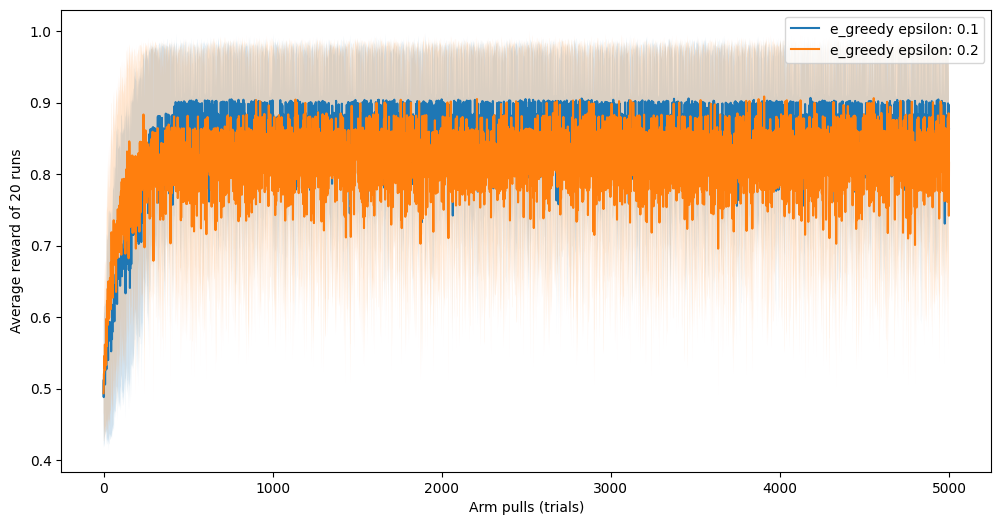

In [22]:
label = ["e_greedy epsilon: 0.1", "e_greedy epsilon: 0.2"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment3,
    ########################################
    label,
)

---
**Question 6 (0-0.5-1pt):** Plot and compare the average rewards for e-greedy for epsilon = 0.1 initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** E-greedy with initial Q = 1 worked better, because it took much less time to converge to optimal actions. That is because, having initial Q values,the algorithm starts with some estimate of the actions' reward values, which allows it to make more informed decisions from the beginning.

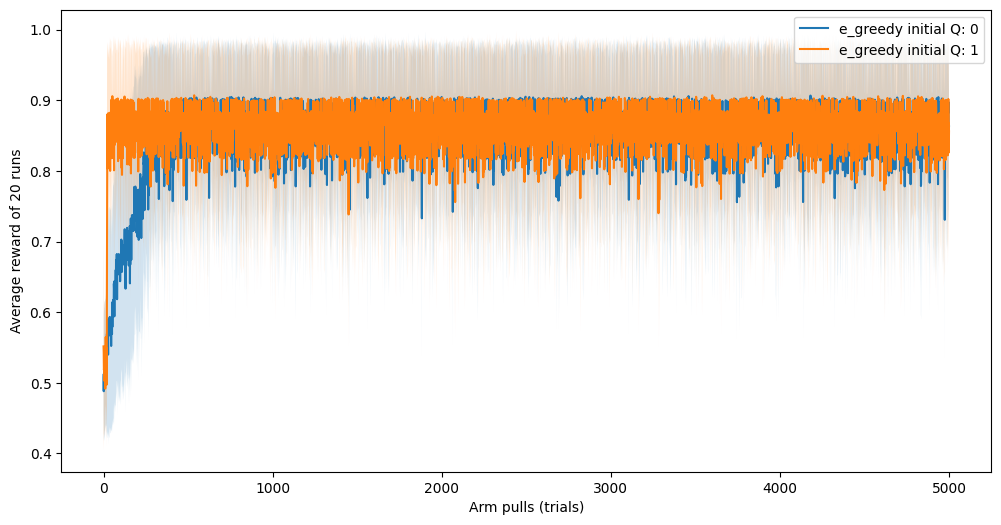

In [18]:
label = ["e_greedy initial Q: 0", "e_greedy initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment1,
    experiment2,
    ########################################
    label,
)

---
**Question 7 (0-0.5-1pt):** Plot and compare the average rewards for UCB initial Q: 0 and 1 in different period of the process.

Please discuss in each phase of the process, which algorithm worked better and why?

**Answer:** These options seem to turn out similar results, I could not tell with certainty which one worked better.

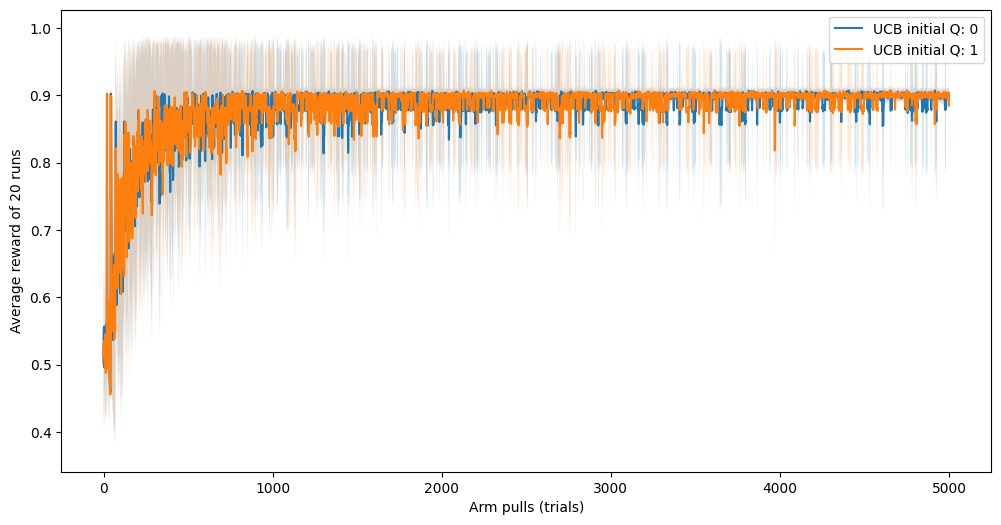

In [19]:
label = ["UCB initial Q: 0", "UCB initial Q: 1"]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment4,
    experiment5,
    ########################################
    label,
)

---

## 3. Final remarks

**Question 8 (0-0.5-1pt):** Based on the all plots and analysis, please plot the best and worst performing algorithms and discuss the comparison? Discuss why that may be the case.

**Answer:** The best algorithm was UCB with initial Q=1, and the worse was E-Greedy with epsilon = 0.2 and Q=0. That is because, the worst algorithm explores too much, and this exploration is done in a "blind" way, differing from the UCB algorithm, which explores new actions based on higher uncertaintanty of rewards, making it more effective. The initial Q value of 1 can also have contributed to faster convergence.

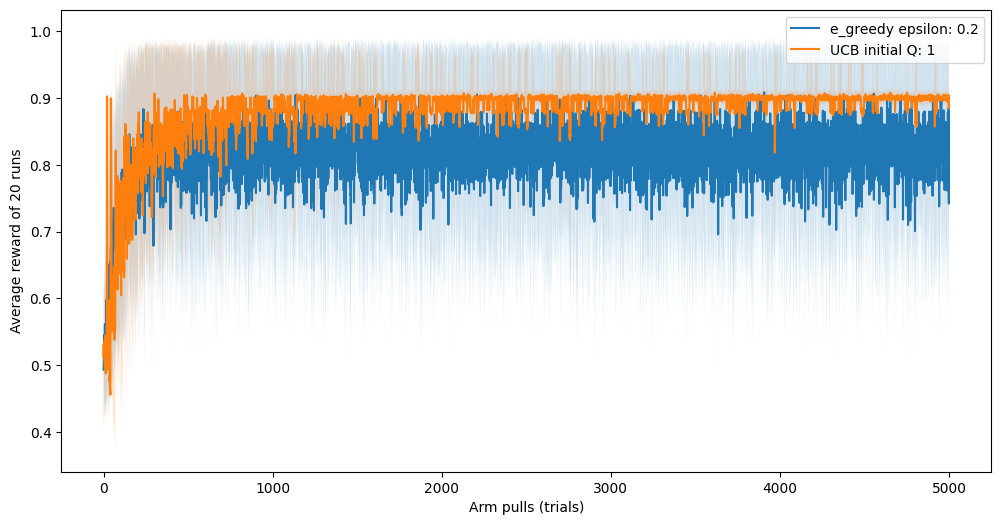

In [21]:
# PLOT THE BEST AND WORST PERFORMING ALGORITHMS AND COMPARE
label = [
    ########### PLEASE FILL IN ##############
    "e_greedy epsilon: 0.2",
    "UCB initial Q: 1"
    ########################################
]
plot_experiments(
    ########### PLEASE FILL IN ##############
    experiment3,
    experiment5,
    ########################################
    label,
)